In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer




In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

### Data cleanup

In [32]:
df = pd.read_csv('survey data.csv')

df

,variant,group,age,gender_1F_2M_3O,education_level,education_level_otherSpecification,income_level,Country_birth,English_proficiency,religion,religion_other_spec,meditation_freq,meditation_howlong,medit_type_silent,medit_type_voice,medit_type_breath,medit_type_body,medit_type_mindfulness,bg_medit_type_other,classicalPsych_frequency,TimeSinceLastClassicalPsych,Psychiatric_No_disclosure,Psychiatric_severe_depression,Psychiatric_bipolar,Psychiatric_psychosis,Psychiatric_anxiety,Psychiatric_ASD,Psychiatric_OCD,Psychiatric_ADHD,psychiatric_other,psychiatric_selfdiagnosed,substance_use_problem,ESP1_INV,2 ESP,3 ESP,4 ESP,exp_LSD,exp_psilocybin,exp_ayahuasca,exp_DMT,exp_5meoDMT,exp_mescaline,exp_ibogaine,exp_salvia,exp_mdma,exp_ketamine,exp_cannabis,other_drug_dummy,exp_other_drug,how_many_drugs,exp_drug_dose,exp_drug_dose_specific,exp_drug_intensity,exp_drug_confidence,exp_medit_silent,exp_medit_voice,exp_medit_breath,exp_medit_body,exp_medit_mindfulness,exp_other_medit,exp_meditation_technique_specific,exp_medit_drug,exp_medit_drugSpecification,exp_when,exp_where,exp_who,exp_guide,exp_purpose_nospecific,exp_purpose_relax_enjoy,exp_purpose_spiritual,exp_purpose_therapeutic,exp_purpose_curiosity,exp_purpose_social,exp_purpose_selfimprovement,exp_purpose_distraction,exp_purpose_other,exp_other_purpose,exp_planned,exp_expect,exp_drug_meditation,exp_drug_medit_silent,exp_drug_medit_voice,exp_drug_medit_breath,exp_drug_medit_body,exp_drug_medit_mindfulness,exp_drug_medit_otherSpecify,Open_report,Open_report typo-corrected,open_report_characters,body_yes_no,Thematic_body,insight_yes_no,Thematic_insights,connection_or_alienation_yes_no,Thematic_connection,preposts_satisfied,preposts_positive,preposts_negative,preposts_meaning,preposts_peace_harmony,prepost_bodydissat,prepost_bodyappre,prepost_embodiment,MEQ30_Q1_mystical,MEQ30_Q2_mystical,MEQ30_Q3_mystical,MEQ30_Q4_mystical,MEQ30_Q5_mystical,MEQ30_Q6_mystical,MEQ30_Q7_mystical,MEQ30_Q8_mystical,MEQ30_Q9_mystical,MEQ30_Q10_mystical,MEQ30_Q11_mystical,MEQ30_Q12_mystical,MEQ30_Q13_mystical,MEQ30_Q14_mystical,MEQ30_Q15_mystical,MEQ30_Q16_positive_mood,MEQ30_Q17_positive_mood,MEQ30_Q18_positive_mood,MEQ30_Q19_positive_mood,MEQ30_Q20_positive_mood,MEQ30_Q21_positive_mood,MEQ30_Q22_transcendence,MEQ30_Q23_transcendence,MEQ30_Q24_transcendence,MEQ30_Q25_transcendence,MEQ30_Q26_transcendence,MEQ30_Q27_transcendence,MEQ30_Q28_ineffability,MEQ30_Q29_ineffability,MEQ30_Q30_ineffability,MEQ30_sum,WEMWBS_optimistic,WEMWBS_useful,WEMWBS_relaxed,WEMWBS_dealing_w_problems,WEMWBS_thinking_clearly,WEMWBS_close_to_others,WEMWBS_make_up_my_own_mind,PoMS_1,PoMS_2,PoMS_3,PoMS_4,PoMS_5_INV,PoMS_6,PoMS_7_INV,BAS1,BAS2,BAS3,BAS4,BAS5,BAS6,BAS7,BAS8,BAS9,BAS10,psy_flex1,psy_flex2,psy_flex3,psy_flex4,psy_flex5,psy_flex6,SVS_1_Power,userid
0,med1,meditation,64,2,4,NaN,2,Sweden,1,3,NaN,6,6,0,0,0,0,1,NaN,3,0,0,0,0,0,1,0,0,0,NaN,NaN,999,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,"Anapana, vipassana",1.0,NaN,6,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,There is a fundamental concept in Buddhism cal...,There is a fundamental concept in Buddhism cal...,408,1,I went into this in the previous question.,1,A deep understanding of what anicca means.,3,NaN,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,47.0,4,4,4,4,4,4,4,3,3,3,3,2,3,1,3,3,4,3,4,2,2,2,3,2,5,5,4,4,4,4,7,6097026029595349a
1,med1,meditation,31,2,7,NaN,4,India,1,5,NaN,4,5,0,0,0,0,1,Vipassana,0,0,0,0,0,0,0,0,0,0,NaN,Mild anxiety,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,Vipassana,1.0,NaN,7,5,3,1,0,0,1,0,0,0,0,0,0,NaN,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I developed all positive feelings. All thought...,I developed all positive feelings. All thought...,158,3,NaN,1,I realized I love my family. I realized that I...,2,NaN,3.0,5.0,

In [33]:
# Only keeping the columns that we need

columns_to_keep = ['group', 'Open_report typo-corrected']

df = df[columns_to_keep] 

df

,group,Open_report typo-corrected
0,meditation,There is a fundamental concept in Buddhism cal...
1,meditation,I developed all positive feelings. All thought...
2,meditation,I had recently lost my father unexpectedly. A ...
3,meditation,There was an objective experience of the self ...
4,meditation,Deep abiding peace with understanding of the i...
...,...,...
208,psychedelics,"It's impossible to write down what happened, a..."
209,psychedelics,You are okay I took approximately half of what...
210,psychedelics,There was an intention setting and intake appt...
211,psychedelics,My memory is quite vague as it was almost 5 ye...


In [34]:
# Dropping rows where open report is empty
df = df.dropna(subset=['Open_report typo-corrected'])

In [35]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 212
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   group                       203 non-null    object
 1   Open_report typo-corrected  203 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [36]:
df['group'] = df['group'].astype('category')
df['Open_report typo-corrected'] = df['Open_report typo-corrected'].astype('string')

/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_27494/3570789679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df['group'].astype('category')
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_27494/3570789679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open_report typo-corrected'] = df['Open_report typo-corrected'].astype('string')


In [37]:
# Creating separate dataframes for psychedelics and meditation groups

psyke = df[df['group']=='psychedelics']

medi = df[df['group']=='meditation']


psyke.head(5)

,group,Open_report typo-corrected
66,psychedelics,I was in my friends' apartment when we took ls...
67,psychedelics,You mean the very last experience? I took some...
68,psychedelics,After first time of eating mushrooms I get awa...
69,psychedelics,I was with a few close friends. We took some s...
70,psychedelics,"As many other testimonials, i experienced a co..."


In [38]:
medi.head(5)

,group,Open_report typo-corrected
0,meditation,There is a fundamental concept in Buddhism cal...
1,meditation,I developed all positive feelings. All thought...
2,meditation,I had recently lost my father unexpectedly. A ...
3,meditation,There was an objective experience of the self ...
4,meditation,Deep abiding peace with understanding of the i...


### Checking word distributions

<Axes: >

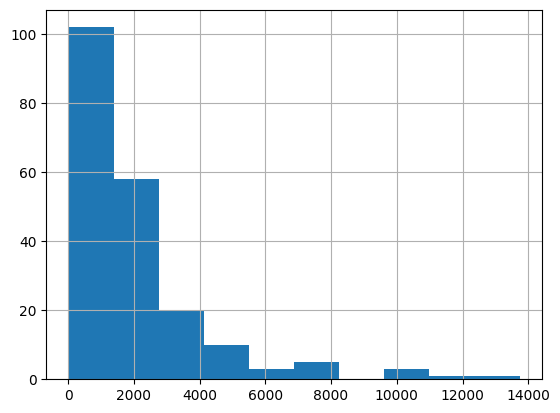

In [39]:
# Histogram of the answer lengths

df['Open_report typo-corrected'].str.len().hist()

<Axes: >

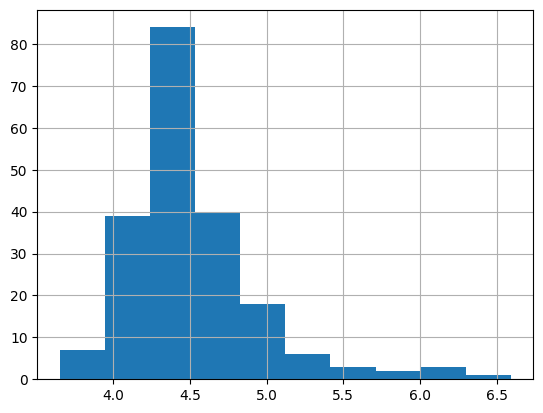

In [41]:
# Histogram of word lengths

df['Open_report typo-corrected'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

<BarContainer object of 10 artists>

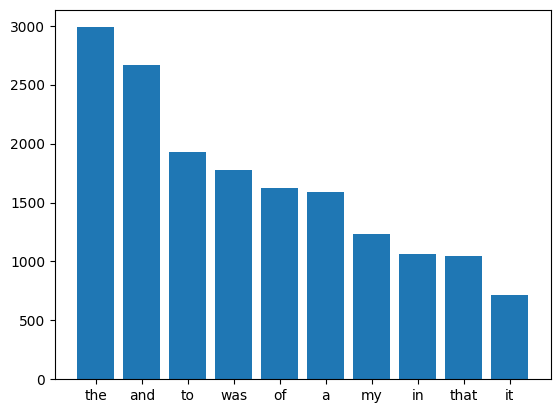

In [51]:
# Visualising the most common stopwords in the dataset
stop_words = set(stopwords.words('english'))

corpus = []
words = df['Open_report typo-corrected'].str.split()
words = words.values.tolist()
corpus = [word for i in words for word in i]

from collections import defaultdict

dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<Axes: >

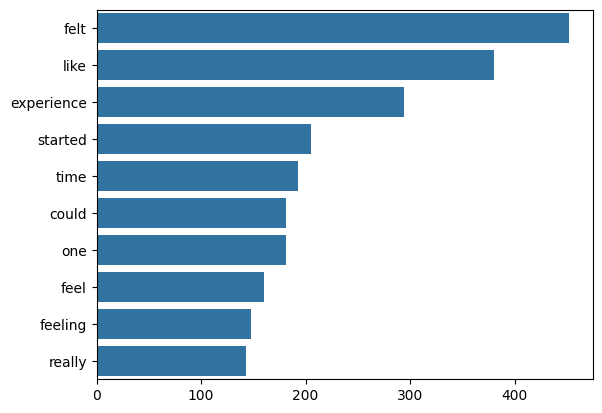

In [55]:
# Checking 10 most common words in the dataset excluding the stopwords

from collections import  Counter


counter=Counter(corpus)
most=counter.most_common()
x, y=[], []
for word,count in most:
    if (word.lower() not in stop_words):  # convert word to lowercase before checking
        x.append(word)
        y.append(count)
    if len(x) == 10:  # stop when we have found 10 words that are not stopwords
        break
        
sns.barplot(x=y,y=x)

### Most common ngrams

In [60]:
# Defining the functions for finding most common ngrams with and without stopwords

from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

#Including stopwords
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


#Excluding stopwords
def get_top_ngram_without_stop(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq = [(word, count) for word, count in words_freq if all(w not in stop_words for w in word.split())]
    return words_freq[:10]



<Axes: >

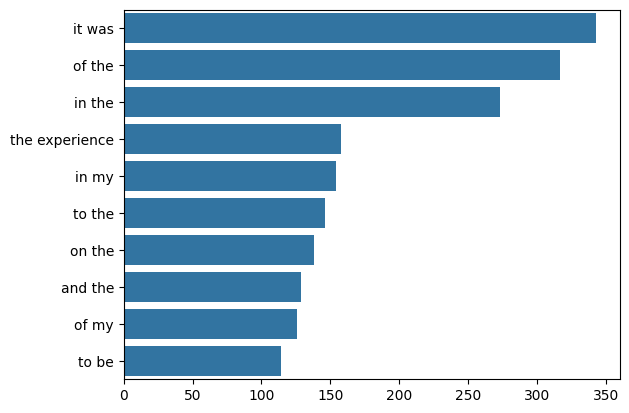

In [61]:
# Checking top bigrams with stopwords

top_n_bigrams=get_top_ngram(df['Open_report typo-corrected'],2)[:10] 

x,y=map(list,zip(*top_n_bigrams)) 

sns.barplot(x=y,y=x)

<Axes: >

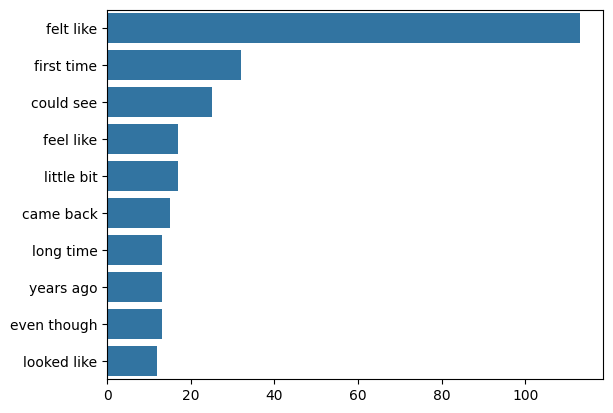

In [62]:
# Top bigrams without stopwords
top_n_bigrams=get_top_ngram_without_stop(df['Open_report typo-corrected'],2)[:10] 

x,y=map(list,zip(*top_n_bigrams)) 

sns.barplot(x=y,y=x)

<Axes: >

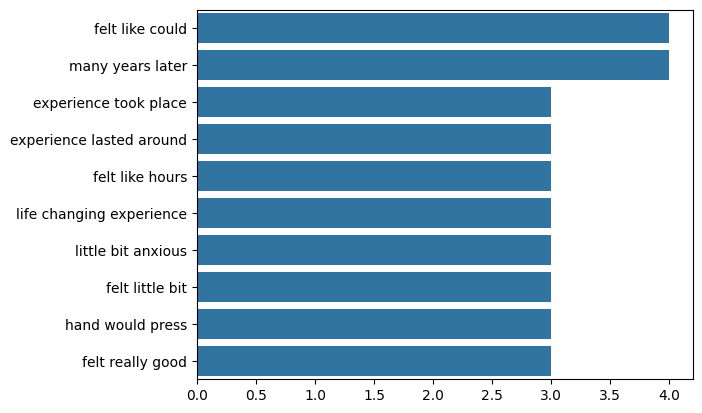

In [64]:
# Top trigrams without stopwords

top_tri_grams=get_top_ngram_without_stop(df['Open_report typo-corrected'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

# Using the spacy approach 

#### https://robertorocha.info/using-nlp-to-analyze-open-ended-responses-in-surveys/

In [68]:
import spacy
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Model 'en_core_web_sm' not found. Downloading...")
    !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1850000

In [70]:
all_text = df['Open_report typo-corrected'].str.cat(sep=' ')

doc = nlp(all_text, disable=['ner'])

In [71]:
# Checking most common words again excluding stopwords

words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct] 
word_freq = Counter(words) 
word_freq.most_common(20)

[('feel', 723),
 ('experience', 578),
 ('like', 433),
 ('time', 321),
 ('start', 256),
 ('life', 209),
 ('go', 209),
 ('know', 186),
 ('body', 178),
 (' ', 177),
 ('come', 172),
 ('think', 171),
 ('friend', 169),
 ('day', 160),
 ('see', 153),
 ('take', 147),
 ('thing', 140),
 ('trip', 134),
 ('remember', 131),
 ('feeling', 130)]

In [72]:
from spacy.matcher import Matcher 

matcher = Matcher(nlp.vocab) 
pattern = [{'POS':'ADJ'}, {'POS':'NOUN'}] 
matcher.add('ADJ_PHRASE', [pattern]) 

matches = matcher(doc, as_spans=True) 
phrases = [] 
for span in matches:
    phrases.append(span.text.lower())
    phrase_freq = Counter(phrases)

phrase_freq.most_common(30)

[('first time', 32),
 ('same time', 16),
 ('little bit', 16),
 ('other people', 15),
 ('long time', 13),
 ('many years', 12),
 ('psychedelic experience', 10),
 ('whole body', 9),
 ('few hours', 9),
 ('next day', 8),
 ('few times', 8),
 ('present moment', 8),
 ('psychedelic experiences', 8),
 ('many times', 7),
 ('everyday life', 6),
 ('whole life', 6),
 ('whole universe', 6),
 ('several hours', 6),
 ('few days', 6),
 ('hard time', 6),
 ('whole experience', 5),
 ('first thing', 5),
 ('nervous system', 5),
 ('same thing', 5),
 ('ego death', 5),
 ('magic mushrooms', 5),
 ('total bliss', 5),
 ('mental health', 4),
 ('important part', 4),
 ('unconditional love', 4)]

In [73]:
# Showing adjectives that follow sentences "I/we feel/am/are"

feel_adj = []
matcher = Matcher(nlp.vocab)
pattern = [{'LOWER' : {'IN' : ['i', 'we']}}, {'OP': '?'}, 
  {'LOWER': {'IN' : ['feel', 'am', "'m", 'are', "'re"]}}, 
  {'OP': '?'}, {'OP': '?'}, {'POS':'ADJ'}]
matcher.add("FeelAdj", [pattern]) 
matches = matcher(doc, as_spans=True) 

for span in matches:
    feel_adj.extend([token.lemma_ for token in span if token.pos_ == 'ADJ'])

Counter(feel_adj).most_common(20)

[('sure', 8),
 ('able', 6),
 ('grateful', 6),
 ('whole', 3),
 ('same', 3),
 ('aware', 3),
 ('sub', 3),
 ('present', 2),
 ('enough', 2),
 ('different', 2),
 ('alone', 2),
 ('vivid', 2),
 ('connected', 2),
 ('lonely', 2),
 ('reborn', 2),
 ('middle', 2),
 ('licensed', 2),
 ('-', 2),
 ('tired', 1),
 ('healthy', 1)]

In [74]:
want_adj = []
matcher = Matcher(nlp.vocab) 

pattern = [{'LOWER' : {'IN' : ['i', 'we']}}, {'IS_ALPHA':True, 'OP':'?'},
   {'LOWER': {'IN' : ['need', 'want']}}, {'IS_ALPHA':True, 'OP':'?'},
   {'IS_ALPHA':True, 'OP':'?'}, {'POS':'NOUN'}]
   
matcher.add("WantPhrase", [pattern]) 
matches = matcher(doc, as_spans=True)

In [76]:
for match in matches:
    print(match.text)

I need more love
I really want salvation
I want my daughter
i want people
I want from life
we need advice


In [77]:
# Checking which words occur near the word "experience"

from spacy.matcher import PhraseMatcher

mental_health_colloc = []
matcher = PhraseMatcher(nlp.vocab, attr = 'LOWER') 
# The attr above ensures all instances are converted to lower-case so the search is case-insensitive

pattern = [nlp.make_doc('experience')]
matcher.add('experience', pattern) 
matches = matcher(doc)

for match_id, start, end in matches:
    span = doc[start-10 : end+10]   
    mental_health_colloc.extend([token.lemma_.lower() for token in span if not token.is_stop and not token.is_punct]) 

Counter(mental_health_colloc).most_common(20)

[('experience', 478),
 ('feel', 62),
 (' ', 33),
 ('time', 32),
 ('like', 31),
 ('life', 29),
 ('psychedelic', 25),
 ('think', 21),
 ('happen', 21),
 ('way', 21),
 ('day', 20),
 ('change', 19),
 ('take', 19),
 ('feeling', 18),
 ('start', 17),
 ('go', 17),
 ('hour', 17),
 ('body', 16),
 ('trip', 15),
 ('year', 14)]

# Topic analysis with LDA

### Pre-processing the open answers by removing stopwords and lemmatising the words

In [26]:
lemmatizer = WordNetLemmatizer()
nltk.download('averaged_perceptron_tagger')

# Creating the pre-processing functions
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Defining a mapping of words to their base forms
manual_mapping = {
    'felt': 'feel',
    'talked': 'talk',
    'thought': 'think'
}

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [manual_mapping.get(token, token) for token in tokens] 
    tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/konsta/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [27]:
# Pre-processing psyke and medi datasets and creating document-term matrices (dtm) for them

psyke_pre_processed_answers = psyke['Open_report typo-corrected'].apply(preprocess_text)
medi_pre_processed_answers = medi['Open_report typo-corrected'].apply(preprocess_text)



### Fitting the LDA models and checking words inside the topics 

In [28]:
# Psychedelic data

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Define the number of topics for each model
num_topics_list = [3, 5, 10, 15, 20, 25, 30]

# Vectorizing the preprocessed text and creating document-term matrices
vectorizer_psyke = CountVectorizer()
psyke_dtm = vectorizer_psyke.fit_transform(psyke_pre_processed_answers)

# Function to print top 10 words for each topic
def print_top_words(model, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

# Train LDA models and print top words
for num_topics in num_topics_list:
    print(f"\nModel with {num_topics} topics:")
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(psyke_dtm)
    print_top_words(lda_model, vectorizer_psyke)


Model with 3 topics:
Topic #1: feel, experience, like, go, time, one, could, take, would, start
Topic #2: experience, feel, like, time, trip, saw, go, get, could, life
Topic #3: feel, like, start, experience, time, go, friend, get, one, life

Model with 5 topics:
Topic #1: experience, feel, go, like, one, could, time, come, life, see
Topic #2: experience, god, like, could, see, feel, friend, think, saw, trip
Topic #3: feel, experience, start, make, like, one, body, friend, go, everything
Topic #4: experience, feel, time, hour, also, life, one, make, consciousness, note
Topic #5: feel, like, time, experience, start, go, get, take, could, friend

Model with 10 topics:
Topic #1: feel, go, like, come, experience, one, get, could, take, body
Topic #2: experience, god, impossible, like, color, trip, anything, another, see, boom
Topic #3: feel, like, experience, one, body, life, child, strong, try, everything
Topic #4: experience, reality, see, one, feel, way, lot, consciousness, life, back


In [29]:
# Meditation data

# Vectorize the preprocessed text
vectorizer_medi = CountVectorizer()
medi_dtm = vectorizer_medi.fit_transform(medi_pre_processed_answers)

# Train LDA models and print top words
for num_topics in num_topics_list:
    print(f"\nModel with {num_topics} topics:")
    lda_model_medi = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model_medi.fit(medi_dtm)
    print_top_words(lda_model_medi, vectorizer_medi)


Model with 3 topics:
Topic #1: experience, meditation, note, think, day, feel, retreat, body, life, like
Topic #2: feel, experience, body, meditation, like, day, retreat, practice, time, go
Topic #3: experience, time, like, feel, mind, life, meditation, state, one, could

Model with 5 topics:
Topic #1: experience, time, day, intense, see, realize, breath, hearing, really, use
Topic #2: feel, experience, like, day, body, meditate, one, time, word, go
Topic #3: experience, time, mind, could, like, feel, life, state, nyams, yet
Topic #4: feel, experience, meditation, body, like, practice, retreat, life, day, could
Topic #5: time, experience, retreat, go, heart, feel, practice, happen, many, back

Model with 10 topics:
Topic #1: time, experience, intense, realize, day, use, breath, hearing, really, act
Topic #2: feel, experience, one, garden, use, state, go, time, calm, day
Topic #3: experience, time, different, level, mind, state, colour, something, rainbow, light
Topic #4: experience, f

### Adding topics to the dataframes???

In [30]:
# # Adding topic column to the dataframes
# psyke_topic_distribution = psyke_lda.transform(psyke_dtm)
# psyke['topic'] = psyke_topic_distribution.argmax(axis=1)

# medi_topic_distribution = medi_lda.transform(medi_dtm)
# medi['topic'] = medi_topic_distribution.argmax(axis=1)

# psyke.head(5)


In [31]:
# medi.head(5)

### Sentiment analysis

In [15]:
psyke.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 66 to 212
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   group                       138 non-null    category
 1   Open_report typo-corrected  138 non-null    string  
dtypes: category(1), string(1)
memory usage: 2.4 KB


In [16]:
medi.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 65
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   group                       65 non-null     category
 1   Open_report typo-corrected  65 non-null     string  
dtypes: category(1), string(1)
memory usage: 1.2 KB


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Apply the function to the DataFrames
psyke['Sentiment'] = psyke['Open_report typo-corrected'].apply(get_sentiment_scores)
medi['Sentiment'] = medi['Open_report typo-corrected'].apply(get_sentiment_scores)


/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_27494/3037653945.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke['Sentiment'] = psyke['Open_report typo-corrected'].apply(get_sentiment_scores)
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_27494/3037653945.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medi['Sentiment'] = medi['Open_report typo-corrected'].apply(get_sentiment_scores)


### Sentiment visualisation

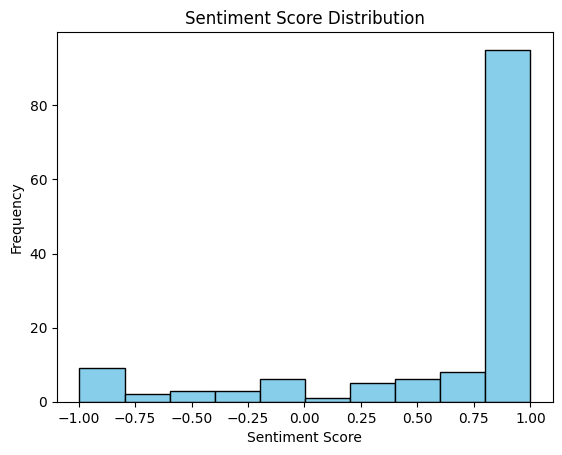

In [18]:
# Creating a sentiment histogram
plt.hist(psyke['Sentiment'], bins=10, color='skyblue', edgecolor='black')

# Add labels and a title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')

# Show the plot
plt.show()

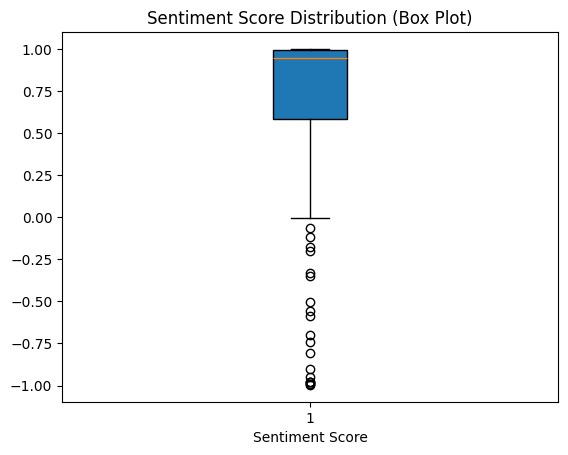

In [19]:
# Creating a box plot
plt.boxplot(psyke['Sentiment'], vert=True, patch_artist=True)

# Add labels and a title
plt.xlabel('Sentiment Score')
plt.title('Sentiment Score Distribution (Box Plot)')

# Show the plot
plt.show()

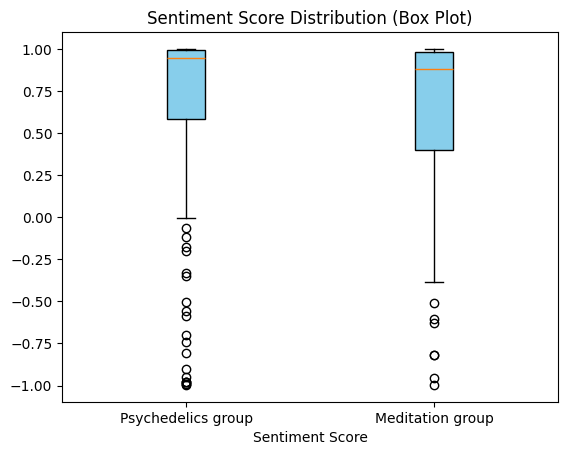

In [20]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create box plots for each DataFrame
boxplot1 = ax.boxplot(psyke['Sentiment'], vert=True, patch_artist=True, positions=[1], labels=['Psychedelics group'])
boxplot2 = ax.boxplot(medi['Sentiment'], vert=True, patch_artist=True, positions=[2], labels=['Meditation group'])

# Customize colors
colors = ['skyblue', 'lightcoral']
for box in [boxplot1, boxplot2]:
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

# Add labels and a title
ax.set_xlabel('Sentiment Score')
ax.set_title('Sentiment Score Distribution (Box Plot)')

# Show the plot
plt.show()

In [21]:
psyke_avg = round(psyke['Sentiment'].mean(), 2)
psyke_std = round(psyke['Sentiment'].std(), 2)

psyke_median = round(psyke['Sentiment'].median(), 2)


medi_avg = round(medi['Sentiment'].mean(), 2)
medi_std = round(medi['Sentiment'].std(), 2)

medi_median = round(medi['Sentiment'].median(), 2)


print('Psychedelics average sentiment score: '+str(psyke_avg)+ ' ('+str(psyke_std) +').')
print('Meditation average sentiment score: '+str(medi_avg)+ ' ('+str(medi_std)+').')
print('Psychedelics median: ' +str(psyke_median))
print('Meditation median: ' +str(medi_median))

Psychedelics average sentiment score: 0.65 (0.59).
Meditation average sentiment score: 0.58 (0.59).
Psychedelics median: 0.94
Meditation median: 0.88


In [22]:
# Performing a t-test just to show that the difference is not statistically significant.
# A t-test is suitable because there are enough rows in both datasets (central limit theorem) and the groups are independent. 

from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_val = ttest_ind(psyke['Sentiment'], medi['Sentiment'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 0.7200604226570054
P-value: 0.4723242757090833


In [23]:
from bayesian_bootstrap import mean, highest_density_interval

# Perform Bayesian bootstrap of the mean
psyke_bootstrap = mean(psyke['Sentiment'].values, 20000)
medi_bootstrap = mean(medi['Sentiment'].values, 20000)

# Compute the 95% highest density interval
psyke_hdi = highest_density_interval(psyke_bootstrap)
medi_hdi = highest_density_interval(medi_bootstrap)

# Print the results
print(f"Psyke mean HDI: {psyke_hdi}")
print(f"Medi mean HDI: {medi_hdi}")

Psyke mean HDI: (0.5459250167414789, 0.7378781842840498)
Medi mean HDI: (0.4385880318574881, 0.7189494497573001)
